# Background
I'm exploring NFT games and studying how different ones work. I got my hands on Zed (www.zed.run) race data and explore it here.

Shout out to hawku (www.hawku.com) for providing the data. Shout out [@donne_martin](https://github.com/donnemartin) for writing the [Titanic notebook](https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/kaggle/titanic.ipynb) that I modeled this one off of.

Author: [@manishsinhaha](https://twitter.com/manishsinhaha) / [arithmetic@gmail.com](mailto:arithmetic@gmail.com)

# Setup

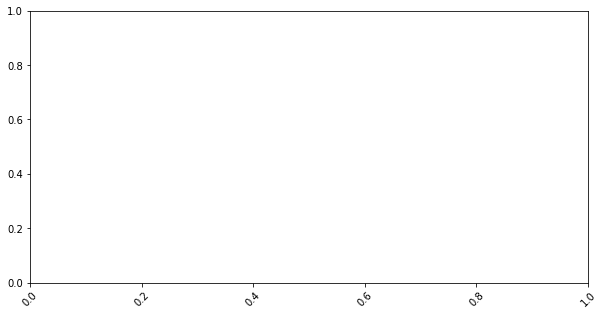

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

df = pd.read_csv('race_db.csv')

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Basics

In [143]:
df.head()

,race_id,start_time,name,distance,class,country,city,weather,fee,prize_pool_first,prize_pool_second,prize_pool_third
0,3SQvsynO,2021-08-01 23:21:38,Stavanger Grand Prix,2000,3,Norway,Stavanger,Sunny,0.0098,0.063504,0.02646,0.015876
1,i8mNR5v,2021-04-17 14:06:57,The Alpine Cup,1200,4,United Kingdom,Northumberland,Sunny,0.0010,0.007200,0.00240,0.001200
2,p5EQ9tFp,2021-08-17 00:44:39,Valparaiso El Clásico,1000,5,Chile,Valparaiso,Sunny,0.0031,0.020088,0.00837,0.005022
3,vviMlMTi,2021-08-13 07:10:00,Manila Gran Copa,1000,1,Philippines,Manila,Sunny,0.0000,0.000480,0.00020,0.000120
4,I95XTUD,2021-07-07 18:33:43,Cape Town Guineas,1400,5,South Africa,Cape Town,Sunny,0.0021,0.013608,0.00567,0.003402


In [144]:
df.tail()

,race_id,start_time,name,distance,class,country,city,weather,fee,prize_pool_first,prize_pool_second,prize_pool_third
323915,8VuCmQco,2021-06-12 23:50:48,The Japan Derby Challenge,1200,4,Japan,Edogawa,Sunny,0.0021,0.013608,0.005670,0.003402
323916,8vudDh,2021-04-09 06:23:03,Royal Wigan Hunt Cup,1200,3,United Kingdom,Wigan,Sunny,0.0048,0.034560,0.011520,0.005760
323917,8vuioDbp,2021-05-16 05:19:23,Rising Sun Classic,1200,5,Japan,Itabashi,Sunny,0.0013,0.009360,0.003120,0.001560
323918,8Vum9uPn,2021-05-20 11:15:07,Irish Oaks 2000,2000,3,Ireland,Cork,Sunny,0.0009,0.005832,0.001944,0.000972
323919,8VV6ofVz,2021-01-14 10:13:07,Sunderland Stakes,1400,3,United Kingdom,Sunderland,Sunny,0.0023,0.016560,0.005520,0.002760


In [145]:
df.dtypes

race_id               object
start_time            object
name                  object
distance               int64
class                  int64
country               object
city                  object
weather               object
fee                  float64
prize_pool_first     float64
prize_pool_second    float64
prize_pool_third     float64
dtype: object

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323920 entries, 0 to 323919
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   race_id            323920 non-null  object 
 1   start_time         323920 non-null  object 
 2   name               323920 non-null  object 
 3   distance           323920 non-null  int64  
 4   class              323920 non-null  int64  
 5   country            323920 non-null  object 
 6   city               323920 non-null  object 
 7   weather            323920 non-null  object 
 8   fee                323920 non-null  float64
 9   prize_pool_first   323920 non-null  float64
 10  prize_pool_second  323920 non-null  float64
 11  prize_pool_third   323920 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 29.7+ MB


In [147]:
df.describe()

,distance,class,fee,prize_pool_first,prize_pool_second,prize_pool_third
count,323920.000000,323920.00000,323920.000000,323920.000000,323920.000000,323920.000000
mean,1702.957520,3.70619,0.001824,0.012660,0.004938,0.002828
std,449.260556,1.31427,0.003308,0.022085,0.008565,0.004930
min,1000.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,3.00000,0.000800,0.005184,0.002160,0.001200
50%,1600.000000,4.00000,0.001100,0.007776,0.002970,0.001782
75%,2000.000000,5.00000,0.002100,0.014256,0.005400,0.003000
max,2600.000000,5.00000,0.261500,1.694520,0.706050,0.423630


# Correlation matrix
Below, we see a higher entry fee correlates to a higher prize pool. Typical R/R ratio seen in gambling games.

In [148]:
df.corr(method ='pearson')

,distance,class,fee,prize_pool_first,prize_pool_second,prize_pool_third
distance,1.000000,-0.014479,0.004710,0.005896,0.005151,0.004548
class,-0.014479,1.000000,-0.113191,-0.149752,-0.144114,-0.138568
fee,0.004710,-0.113191,1.000000,0.995499,0.993146,0.982189
prize_pool_first,0.005896,-0.149752,0.995499,1.000000,0.992891,0.978385
prize_pool_second,0.005151,-0.144114,0.993146,0.992891,1.000000,0.996043
prize_pool_third,0.004548,-0.138568,0.982189,0.978385,0.996043,1.000000


# Class

Class 5 is the lowest rated class, class 1 is the highest rated class.

Each horse occupies a different class. After each race, a horse can regress, stay the same, or go up a class. My guess is that races are designated a class to serve as a load balancing mechanism: a horse can compete in a higher-tiered race outside of its current class, but cannot compete in a lower-tiered class. This way, players with powerful horses (of which there are fewer of) cannot endlessly pick on players with less powerful horses. Players with less powerful horses can continue to "grind" their way up to a higher rated class.

<AxesSubplot:title={'center':'Race class counts'}>

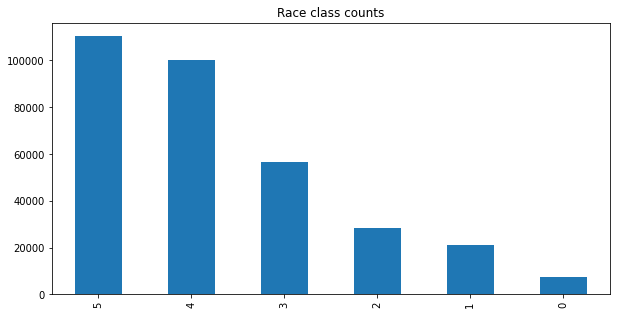

In [149]:
df['class'].value_counts().plot(kind='bar', title='Race class counts')

# Distance

Every horse has a distance preference attribute (I think stored off-chain and hidden). Each race has a defined distance. Because the attribute is hidden, you have to race your horse and find out over time where it does well. Interesting gameplay mechanic, I think.

<AxesSubplot:title={'center':'Distance counts'}>

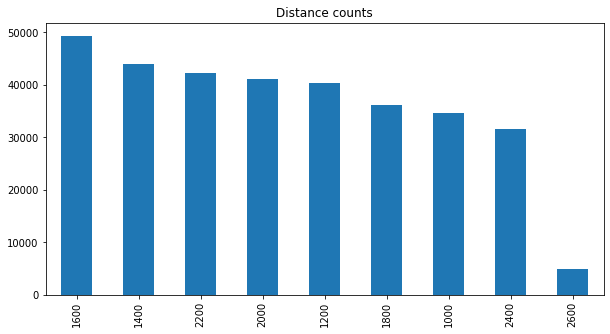

In [177]:
df['distance'].value_counts().plot(kind='bar', title='Distance counts')

## Entry fee

Every race has an entry fee, paid in WETH. The top three winners of a race win a prize. Note - none of this is normalized to account for price fluctuations.

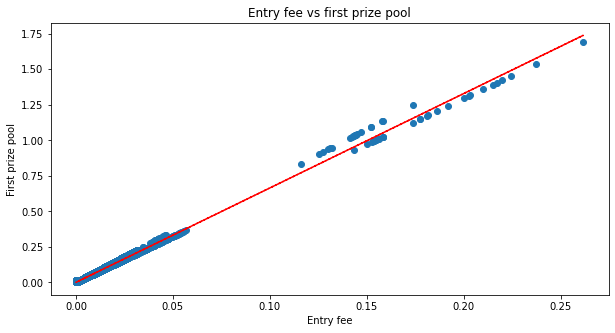

In [151]:
x = df['fee']
y = df['prize_pool_first']
plt.scatter(x,y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("Entry fee vs first prize pool")
plt.xlabel("Entry fee")
plt.ylabel("First prize pool")
    
plt.show()

# Races
A slow start early in the year followed by what looks like an upcoming ramp up period.

<AxesSubplot:xlabel='start_time,start_time'>

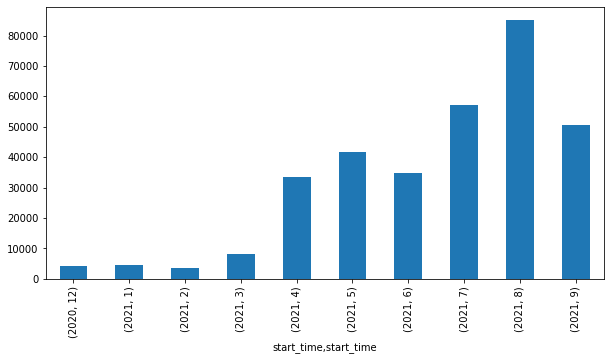

In [178]:
df["start_time"] = df["start_time"].astype("datetime64")
df.groupby([df["start_time"].dt.year, df["start_time"].dt.month]).fee.count().plot(kind='bar')